🏷️ **코랩 환경에서 한글 폰트 사용하기**


---



In [74]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
#한글 폰트 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#그래프에서 마이너스 기호가 표시
plt.rcParams['axes.unicode_minus'] = False  

import warnings
warnings.filterwarnings('ignore')

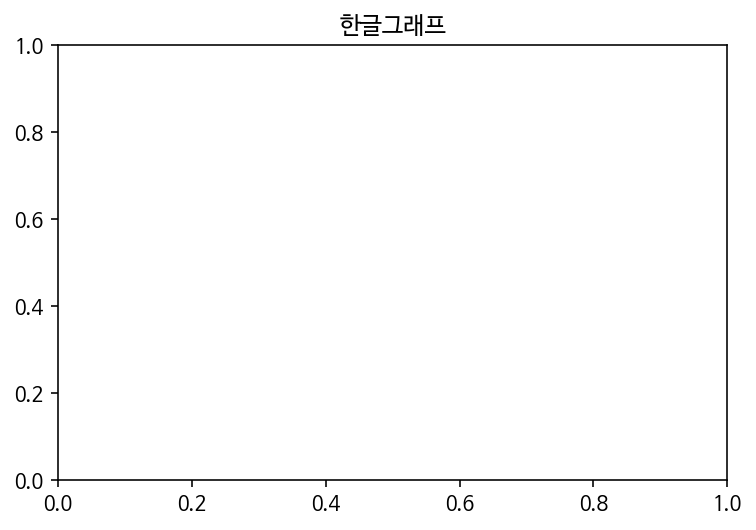

In [76]:
plt.title('한글그래프')
plt.show()

# 탐색적자료분석(Exploratory Data Analysis; EDA)
+ 수집된 데이터를 다양한 각도에서 관찰하고 이해하는 과정으로 데이터가 가지고 있는 특성을 이해하고 잠재적인 문제를 발견하는 과정

+ EDA의 주요 내용 : 데이터 분석에 앞서 데이터의 주요 특성을 요약 / 시각화
  + 관측치들의 패턴 탐색
  + 잘못된 자료들을 탐색 
  + 변수들간의 관계 파악



# 해결문제 
## 대학알리미 기숙사 수용현황 분석
+ 기숙사수용률 : 수용가능인원 / 재학생수 * 100 
+ 지원자수합계 : 지원자수(동일지역) + 지원자수(타지역)
+ 입사경쟁률 :지원자수합계 / 수용가능인원 

## 분석할 데이터 가져오기

In [77]:
import pandas as pd

&#9997; **pandas 노트 : 판다스 지수표현을 실수표현으로**


---
```
pd.options.display.float_format = '{:.2f}'.format
``` 
---

In [78]:
pd.options.display.float_format = '{:.2f}'.format

In [79]:
# 자료 불러오기
df = pd.read_csv('/content/drive/MyDrive/01_특강/2022_일과고R&E/기숙사수용현황.csv', encoding='cp949')
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,1인실기숙사비,2인실실수,2인실식비,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비
0,2021.00,대학교,사립,경남,기존,가야대학교(김해),"2,060",88,672,197,...,0,0,0,0,0.00,0,0,88.00,"3,500","131,250"
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),"2,060",80,672,183,...,0,0,0,0,0.00,0,0,80.00,"3,500","128,571"
2,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",98,"2,383",140,...,"428,571",96,0,"326,786",0.00,0,0,0.00,0,0
3,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",140,"2,383",339,...,"424,779",68,0,"292,035",61.00,0,"207,080",9.00,0,"169,912"
4,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",393,"2,383",843,...,"482,737",288,0,"343,790",0.00,0,0,101.00,0,"210,105"


In [80]:
#데이터확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1152 non-null   float64
 1   학교종류         1152 non-null   object 
 2   설립구분         1152 non-null   object 
 3   지역           1152 non-null   object 
 4   상태           1152 non-null   object 
 5   학교           1152 non-null   object 
 6   재학생수(A)      1152 non-null   object 
 7   총 실수         1152 non-null   object 
 8   수용가능인원(B)    1152 non-null   object 
 9   실수용(내국인)     1152 non-null   object 
 10  실수용(외국인)     1152 non-null   float64
 11  실수용(비학위)외국인  1152 non-null   float64
 12  지원자수(동일지역)   1152 non-null   object 
 13  지원자수(타지역)    1152 non-null   object 
 14  의무식
여부       1149 non-null   object 
 15  구분           1070 non-null   object 
 16  건물명          1149 non-null   object 
 17  준공연도         1149 non-null   float64
 18  1인실실수        1152 non-null   float64
 19  1인실식비 

In [81]:
#열명확인 
df.columns 

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식\n여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비',
       '1인실기숙사비', '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비',
       '4인실실수', '4인실식비', '4인실기숙사비'],
      dtype='object')

&#9997; **pandas 노트 : 열명 변경**


---
+ **columns 속성**  
```
  df.columns = [열의 개수와 동일한 요소를 갖는 리스트]
```
---


In [82]:
#열명에 \n 제거
df.columns = [col.replace('\n','') for col in df.columns]
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비'],
      dtype='object')

In [83]:
df['의무식여부']

0         O
1         O
2         X
3         X
4         X
       ... 
1148      X
1149      X
1150      X
1151      X
1152    NaN
Name: 의무식여부, Length: 1153, dtype: object

## 전체적인 데이터 살펴보기
+ 데이터 항목의 개수, 속성 목록, NAN 값, 각 속성이 가지는 데이터형 등을 확인
+ 데이터 가공 과정에서 데이터의 오류나 누락이 없는지 데이터의 head와 tail을 확인
+ 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 확인

### 결측치 데이터 처리

&#9997; **pandas 노트 : 결측치 확인**


---
+ **결측값**
  + Null 값은 비어있는 값, 고급 언어로 결측값
  + pandas 에서는 NaN => Not a Number 로 표기 
+ **.isna()** , **.isnull()**
  + NaN 값 포함 여부를 Boolean 타입의 값으로 반환
  + 데이터프레임 전체에도 적용되고 각열에도 적용가능
  + 개수를 구하고 싶으면 sum()함수 사용
+ **.notna(), notnull()**
  + 비결측치 값 확인

+ **.dropna()**
  + 결측치를 제거
  + axis값 0이면 행, 1이면 열 삭제
  + how값이 'any' 이면 결측치가 하나라도 있으면 삭제할 것인지(any), 모든 값이 결측치여야 삭제할 것인지를(all) 결정
  + 참고) drop() : 결측치와 상관없이 삭제

+ **.fillna()**
  + 결측치 값을 대체
  + 특정열의 값에서 대체 하려면 fillna({열명:값})

+ **0을 null값으로 변경**
  + df.replace(0, np.NaN)
    + import numpy as np
---

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1152 non-null   float64
 1   학교종류         1152 non-null   object 
 2   설립구분         1152 non-null   object 
 3   지역           1152 non-null   object 
 4   상태           1152 non-null   object 
 5   학교           1152 non-null   object 
 6   재학생수(A)      1152 non-null   object 
 7   총 실수         1152 non-null   object 
 8   수용가능인원(B)    1152 non-null   object 
 9   실수용(내국인)     1152 non-null   object 
 10  실수용(외국인)     1152 non-null   float64
 11  실수용(비학위)외국인  1152 non-null   float64
 12  지원자수(동일지역)   1152 non-null   object 
 13  지원자수(타지역)    1152 non-null   object 
 14  의무식여부        1149 non-null   object 
 15  구분           1070 non-null   object 
 16  건물명          1149 non-null   object 
 17  준공연도         1149 non-null   float64
 18  1인실실수        1152 non-null   float64
 19  1인실식비 

In [85]:
#null 개수 확인
df.isnull().sum() 

기준연도            1
학교종류            1
설립구분            1
지역              1
상태              1
학교              1
재학생수(A)         1
총 실수            1
수용가능인원(B)       1
실수용(내국인)        1
실수용(외국인)        1
실수용(비학위)외국인     1
지원자수(동일지역)      1
지원자수(타지역)       1
의무식여부           4
구분             83
건물명             4
준공연도            4
1인실실수           1
1인실식비           1
1인실기숙사비         1
2인실실수           1
2인실식비           1
2인실기숙사비         1
3인실실수           1
3인실식비           1
3인실기숙사비         1
4인실실수           1
4인실식비           1
4인실기숙사비         1
dtype: int64

In [86]:
# 준공연도가 Null 확인
df[df['준공연도'].isnull()]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,1인실기숙사비,2인실실수,2인실식비,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비
70,2021.00,대학교,사립,서울,기존,경기대학교 _제2캠퍼스,"2,673",0,0,0,...,0,0,0,0,0.00,0,0,0.00,0,0
78,2021.00,대학교,사립,강원,기존,경동대학교 _제2캠퍼스,0,0,0,0,...,0,0,0,0,0.00,0,0,0.00,0,0
715,2021.00,대학교,사립,전북,기존,예원예술대학교,"1,067",0,0,0,...,0,0,0,0,0.00,0,0,0.00,0,0
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **조건에 맞는 행을 찾아 삭제**

&#9997; **pandas 노트 : 행과 열 삭제**


---
+ **.drop(인덱스, axis옵션)**
  + axis가 '0' 이라면 행 삭제, '1' 이라면 열 삭제 
---

In [87]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1152 non-null   float64
 1   학교종류         1152 non-null   object 
 2   설립구분         1152 non-null   object 
 3   지역           1152 non-null   object 
 4   상태           1152 non-null   object 
 5   학교           1152 non-null   object 
 6   재학생수(A)      1152 non-null   object 
 7   총 실수         1152 non-null   object 
 8   수용가능인원(B)    1152 non-null   object 
 9   실수용(내국인)     1152 non-null   object 
 10  실수용(외국인)     1152 non-null   float64
 11  실수용(비학위)외국인  1152 non-null   float64
 12  지원자수(동일지역)   1152 non-null   object 
 13  지원자수(타지역)    1152 non-null   object 
 14  의무식여부        1149 non-null   object 
 15  구분           1070 non-null   object 
 16  건물명          1149 non-null   object 
 17  준공연도         1149 non-null   float64
 18  1인실실수        1152 non-null   float64
 19  1인실식비 

In [89]:
df[df['총 실수'] == '0'].index 

Int64Index([70, 76, 78, 201, 715, 726, 769, 1031, 1032, 1047, 1048, 1049, 1050,
            1051, 1052],
           dtype='int64')

In [90]:
#총실수가 0인 데이터 삭제
df = df.drop(df[df['총 실수'] == '0'].index ) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1152
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1137 non-null   float64
 1   학교종류         1137 non-null   object 
 2   설립구분         1137 non-null   object 
 3   지역           1137 non-null   object 
 4   상태           1137 non-null   object 
 5   학교           1137 non-null   object 
 6   재학생수(A)      1137 non-null   object 
 7   총 실수         1137 non-null   object 
 8   수용가능인원(B)    1137 non-null   object 
 9   실수용(내국인)     1137 non-null   object 
 10  실수용(외국인)     1137 non-null   float64
 11  실수용(비학위)외국인  1137 non-null   float64
 12  지원자수(동일지역)   1137 non-null   object 
 13  지원자수(타지역)    1137 non-null   object 
 14  의무식여부        1137 non-null   object 
 15  구분           1058 non-null   object 
 16  건물명          1137 non-null   object 
 17  준공연도         1137 non-null   float64
 18  1인실실수        1137 non-null   float64
 19  1인실식비 

In [91]:
#행전체가 nan이면 삭제
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1137 non-null   float64
 1   학교종류         1137 non-null   object 
 2   설립구분         1137 non-null   object 
 3   지역           1137 non-null   object 
 4   상태           1137 non-null   object 
 5   학교           1137 non-null   object 
 6   재학생수(A)      1137 non-null   object 
 7   총 실수         1137 non-null   object 
 8   수용가능인원(B)    1137 non-null   object 
 9   실수용(내국인)     1137 non-null   object 
 10  실수용(외국인)     1137 non-null   float64
 11  실수용(비학위)외국인  1137 non-null   float64
 12  지원자수(동일지역)   1137 non-null   object 
 13  지원자수(타지역)    1137 non-null   object 
 14  의무식여부        1137 non-null   object 
 15  구분           1058 non-null   object 
 16  건물명          1137 non-null   object 
 17  준공연도         1137 non-null   float64
 18  1인실실수        1137 non-null   float64
 19  1인실식비 

In [92]:
df.isna().sum() 

기준연도            0
학교종류            0
설립구분            0
지역              0
상태              0
학교              0
재학생수(A)         0
총 실수            0
수용가능인원(B)       0
실수용(내국인)        0
실수용(외국인)        0
실수용(비학위)외국인     0
지원자수(동일지역)      0
지원자수(타지역)       0
의무식여부           0
구분             79
건물명             0
준공연도            0
1인실실수           0
1인실식비           0
1인실기숙사비         0
2인실실수           0
2인실식비           0
2인실기숙사비         0
3인실실수           0
3인실식비           0
3인실기숙사비         0
4인실실수           0
4인실식비           0
4인실기숙사비         0
dtype: int64

In [93]:
df['구분'].unique() 

array(['직영(구내)', '직영(구외)', '임차', '행복기숙사', '민자(BTL)', '민자(BTO)', nan],
      dtype=object)

In [94]:
#구분 값 확인
dvc = df['구분'].value_counts() 
dvc

직영(구내)     787
민자(BTL)     87
직영(구외)      68
임차          56
행복기숙사       41
민자(BTO)     19
Name: 구분, dtype: int64

In [95]:
dvc_max_idx = dvc[dvc == dvc.max()].index[0]
dvc_max_idx

'직영(구내)'

In [96]:
#구분의 Null값은 제일 많은 값으로 dvc[dvc == dvc.max()].index 
idx = df[df['구분'].isnull()].index

In [97]:
df.loc[938, '구분']

nan

In [98]:
df.loc[idx, '구분'] =  dvc_max_idx

In [99]:
df['구분'].value_counts() 

직영(구내)     866
민자(BTL)     87
직영(구외)      68
임차          56
행복기숙사       41
민자(BTO)     19
Name: 구분, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1137 non-null   float64
 1   학교종류         1137 non-null   object 
 2   설립구분         1137 non-null   object 
 3   지역           1137 non-null   object 
 4   상태           1137 non-null   object 
 5   학교           1137 non-null   object 
 6   재학생수(A)      1137 non-null   object 
 7   총 실수         1137 non-null   object 
 8   수용가능인원(B)    1137 non-null   object 
 9   실수용(내국인)     1137 non-null   object 
 10  실수용(외국인)     1137 non-null   float64
 11  실수용(비학위)외국인  1137 non-null   float64
 12  지원자수(동일지역)   1137 non-null   object 
 13  지원자수(타지역)    1137 non-null   object 
 14  의무식여부        1137 non-null   object 
 15  구분           1137 non-null   object 
 16  건물명          1137 non-null   object 
 17  준공연도         1137 non-null   float64
 18  1인실실수        1137 non-null   float64
 19  1인실식비 

### **열 타입 변경**


---
+ df.dtypes : 데이터타입 확인
+ df.astype(변환타입) : 전체 열을 변환
+ df.astype({열:변환타입}) : 해당 열을 변환
  + pd.to_numeric(열): 문자열 칼럼의 숫자형 변환 
  + pd.to_datetime(열) : 날짜형식으로 변경


---



+ object -> int
  + 재학생수(A)  
  + 총 실수   
  + 수용가능인원(B) 
  + 실수용(내국인) 
  + 지원자수(동일지역) 
  + 지원자수(타지역)  
  + 1인실식비 
  + 1인실기숙사비  
  + 2인실실수 
  + 2인실식비 
  + 2인실기숙사비  
  + 3인실식비 
  + 3인실기숙사비 
  + 4인실식비 
  + 4인실기숙사비 

+ float -> int -> category
  + 준공연도  

In [101]:
#수치열로 변경할 열명
colint = ['재학생수(A)', '총 실수', '수용가능인원(B)','실수용(내국인)',
          '지원자수(동일지역)','지원자수(타지역)',
          '1인실식비','1인실기숙사비',
          '2인실실수','2인실식비','2인실기숙사비',
          '3인실식비','3인실기숙사비',
          '4인실식비','4인실기숙사비']
colint

['재학생수(A)',
 '총 실수',
 '수용가능인원(B)',
 '실수용(내국인)',
 '지원자수(동일지역)',
 '지원자수(타지역)',
 '1인실식비',
 '1인실기숙사비',
 '2인실실수',
 '2인실식비',
 '2인실기숙사비',
 '3인실식비',
 '3인실기숙사비',
 '4인실식비',
 '4인실기숙사비']

In [102]:
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,1인실기숙사비,2인실실수,2인실식비,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비
0,2021.00,대학교,사립,경남,기존,가야대학교(김해),"2,060",88,672,197,...,0,0,0,0,0.00,0,0,88.00,"3,500","131,250"
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),"2,060",80,672,183,...,0,0,0,0,0.00,0,0,80.00,"3,500","128,571"
2,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",98,"2,383",140,...,"428,571",96,0,"326,786",0.00,0,0,0.00,0,0
3,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",140,"2,383",339,...,"424,779",68,0,"292,035",61.00,0,"207,080",9.00,0,"169,912"
4,2021.00,대학교,사립,경기,기존,가천대학교,"20,671",393,"2,383",843,...,"482,737",288,0,"343,790",0.00,0,0,101.00,0,"210,105"


In [103]:
#object -> int
for col in colint :
  df[col] = df[col].str.replace(',', '')
  df[col] = df[col].astype(float)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         1137 non-null   float64
 1   학교종류         1137 non-null   object 
 2   설립구분         1137 non-null   object 
 3   지역           1137 non-null   object 
 4   상태           1137 non-null   object 
 5   학교           1137 non-null   object 
 6   재학생수(A)      1137 non-null   float64
 7   총 실수         1137 non-null   float64
 8   수용가능인원(B)    1137 non-null   float64
 9   실수용(내국인)     1137 non-null   float64
 10  실수용(외국인)     1137 non-null   float64
 11  실수용(비학위)외국인  1137 non-null   float64
 12  지원자수(동일지역)   1137 non-null   float64
 13  지원자수(타지역)    1137 non-null   float64
 14  의무식여부        1137 non-null   object 
 15  구분           1137 non-null   object 
 16  건물명          1137 non-null   object 
 17  준공연도         1137 non-null   float64
 18  1인실실수        1137 non-null   float64
 19  1인실식비 

In [106]:
# 카테고리열 변경(float->int->category)
df['기준연도'] = df['기준연도'].astype('int').astype('category') 
df['준공연도'] = df['준공연도'].astype('int').astype('category')
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   category
 18  1인실실수        1137 non-null  

In [107]:
df['기준연도'].unique()

[2021]
Categories (1, int64): [2021]

In [108]:
df['준공연도'].unique()

[2009, 2003, 2019, 2015, 2017, ..., 1979, 1969, 1975, 1972, 1958]
Length: 55
Categories (55, int64): [1958, 1961, 1962, 1969, ..., 2018, 2019, 2020, 2021]

### 열 추가
+ 기숙사수용률 : 수용가능인원 / 재학생수 * 100 
+ 지원자수합계 : 지원자수(동일지역) + 지원자수(타지역)
+ 입사경쟁률 :지원자수합계 / 수용가능인원 

&#9997; **pandas 노트 : 특정 자료 추출 및 변경**


---
+ df.loc[행인덱스, 열인덱스]
  + 특정 열 가져오기 : df.loc[:, 열인덱스]
  + 특정 행 가져오기 : df.loc[행인덱스, :]
  + 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]
+ 열의 내용 변경
```
df[열명] = 변경값
```



---



&#9997; **pandas 노트 : 새로운 열 추가**


---
 
+ df[새로운열명] = 값
+ 시리즈.map(딕션너리) : 해당 시리즈의 내용에 매핑할 값을 딕셔너리 형태로 지정
---

+ 기숙사수용률 : 수용가능인원 / 재학생수 * 100
+ 지원자수합계 : 지원자수(동일지역) + 지원자수(타지역)
+ 입사경쟁률 :지원자수합계 / 수용가능인원

In [109]:
df['기숙사수용률'] = df['수용가능인원(B)'] / df['재학생수(A)']  * 100
df['지원자수합계'] = df['지원자수(동일지역)']  + df['지원자수(타지역)']
df['입사경쟁률'] = df['지원자수합계'] / df['수용가능인원(B)']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   category
 18  1인실실수        1137 non-null  

In [111]:
df.sort_values('기숙사수용률', ascending=False).head(10)[['학교','기숙사수용률']]

,학교,기숙사수용률
302,대전가톨릭대학교,798.46
711,영산선학대학교,347.06
710,영산선학대학교,347.06
712,영산선학대학교,347.06
713,영산선학대학교,347.06
236,금강대학교,224.11
237,금강대학교,224.11
205,광주가톨릭대학교,204.59
206,광주가톨릭대학교,204.59
207,광주가톨릭대학교,204.59


In [112]:
df.sort_values('입사경쟁률', ascending=False).head(10)[['학교','기숙사수용률','입사경쟁률']]

,학교,기숙사수용률,입사경쟁률
871,진주교육대학교,9.78,3.32
782,인제대학교,24.95,2.37
19,가톨릭대학교 _제2캠퍼스,5.20,1.96
1057,한국항공대학교,18.10,1.59
778,인제대학교,24.95,1.56
455,상명대학교 _제2캠퍼스,19.11,1.46
1030,한국예술종합학교,7.78,1.25
859,중앙대학교,13.10,1.24
412,백석대학교,13.87,1.21
500,서울여자대학교,12.11,1.20


In [ ]:
df[df['학교'].isin(['서울여자대학교', '서울대학교'])]

&#9997; **pandas 노트 : 데이터프레임 합치기**


---
+ df.append(추가데이터프레임)
+ pd.concat([df1, df2, ....])


---



In [115]:
#사립학교와 아닌 학교 나누기
df1 = df[df['설립구분'] == '사립']
df2 =df[df['설립구분'] != '사립']  

In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 1151
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         848 non-null    category
 1   학교종류         848 non-null    object  
 2   설립구분         848 non-null    object  
 3   지역           848 non-null    object  
 4   상태           848 non-null    object  
 5   학교           848 non-null    object  
 6   재학생수(A)      848 non-null    float64 
 7   총 실수         848 non-null    float64 
 8   수용가능인원(B)    848 non-null    float64 
 9   실수용(내국인)     848 non-null    float64 
 10  실수용(외국인)     848 non-null    float64 
 11  실수용(비학위)외국인  848 non-null    float64 
 12  지원자수(동일지역)   848 non-null    float64 
 13  지원자수(타지역)    848 non-null    float64 
 14  의무식여부        848 non-null    object  
 15  구분           848 non-null    object  
 16  건물명          848 non-null    object  
 17  준공연도         848 non-null    category
 18  1인실실수        848 non-null    

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 27 to 1091
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         289 non-null    category
 1   학교종류         289 non-null    object  
 2   설립구분         289 non-null    object  
 3   지역           289 non-null    object  
 4   상태           289 non-null    object  
 5   학교           289 non-null    object  
 6   재학생수(A)      289 non-null    float64 
 7   총 실수         289 non-null    float64 
 8   수용가능인원(B)    289 non-null    float64 
 9   실수용(내국인)     289 non-null    float64 
 10  실수용(외국인)     289 non-null    float64 
 11  실수용(비학위)외국인  289 non-null    float64 
 12  지원자수(동일지역)   289 non-null    float64 
 13  지원자수(타지역)    289 non-null    float64 
 14  의무식여부        289 non-null    object  
 15  구분           289 non-null    object  
 16  건물명          289 non-null    object  
 17  준공연도         289 non-null    category
 18  1인실실수        289 non-null   

In [118]:
df3 = df1.append(df2) 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1091
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   category
 18  1인실실수        1137 non-null  

In [ ]:
df4 = pd.concat([df1, df2]) 
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1091
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   category
 18  1인실실수        1137 non-null  

&#9997; **pandas 노트 : 데이터 정보 확인**


---
+ **df.info()**
  + 데이터에 대한 전반적인 정보
  + 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력  
+ **df.shape**
  + 데이터의 (행, 열) 크기를 확인
+ **df.describe()**
  + 데이터의 컬럼별 요약 통계량
  + mean(), max(), median()등 개별 함수를 사용하여 통계량을 계산가능
  + 범주형 데이터 요약 
      + .describe()의 include 옵션 값 : 범주형 자료형 요약
      + 'all' : 모든 열에 대해 요약
      + None : 수치형 열만 요약 (생략하면 기본값)
      + 'O' : 범주형 열 요약
      + 데이터타입 : 해당 데이터타입 요약


---



In [119]:
df.describe() 

,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),실수용(외국인),실수용(비학위)외국인,지원자수(동일지역),지원자수(타지역),1인실실수,1인실식비,...,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률
count,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,...,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00
mean,10529.30,143.94,2480.93,177.60,13.68,4.65,25.51,291.47,13.68,285.71,...,155920.56,10.22,102.36,30625.04,18.22,247.30,50812.99,32.33,316.98,0.17
std,7539.92,168.73,1806.42,247.21,38.10,18.34,88.80,445.82,47.56,918.34,...,125097.36,48.73,576.26,75909.13,44.83,887.89,94871.17,39.35,473.19,0.27
min,34.00,1.00,54.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.66,0.00,0.00
25%,4267.00,39.00,1154.00,9.00,0.00,0.00,0.00,15.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.41,25.00,0.01
50%,8193.00,97.00,2141.00,96.00,0.00,0.00,0.00,125.00,0.00,0.00,...,166400.00,0.00,0.00,0.00,0.00,0.00,0.00,23.89,151.00,0.07
75%,15550.00,181.00,3292.00,234.00,7.00,0.00,14.00,364.00,3.00,0.00,...,227989.00,0.00,0.00,0.00,6.00,0.00,109821.00,34.41,405.00,0.22
max,29827.00,1582.00,9661.00,2324.00,515.00,173.00,1477.00,4668.00,728.00,5000.00,...,920000.00,796.00,5000.00,473684.00,371.00,5000.00,890110.00,798.46,4772.00,3.32


In [121]:
df.describe(include=['category', 'object'])

,기준연도,학교종류,설립구분,지역,상태,학교,의무식여부,구분,건물명,준공연도
count,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
unique,1,4,6,17,1,223,2,6,1014,55
top,2021,대학교,사립,서울,기존,포항공과대학교,X,직영(구내),생활관,2009
freq,1137,1104,848,273,1137,29,812,866,12,58


In [122]:
df['준공연도'].unique()

[2009, 2003, 2019, 2015, 2017, ..., 1979, 1969, 1975, 1972, 1958]
Length: 55
Categories (55, int64): [1958, 1961, 1962, 1969, ..., 2018, 2019, 2020, 2021]

In [127]:
import numpy as np

In [129]:
df['준공연도'] = df['준공연도'].astype('int')

In [130]:
#새로운 범주 추가
df['준공구분'] = np.where((2022 - df['준공연도']) <= 10, '10년이하', np.where((2022 - df['준공연도']) <= 20, '11~20년이하', '20년초과') )
df['준공구분'].unique()

array(['11~20년이하', '10년이하', '20년초과'], dtype=object)

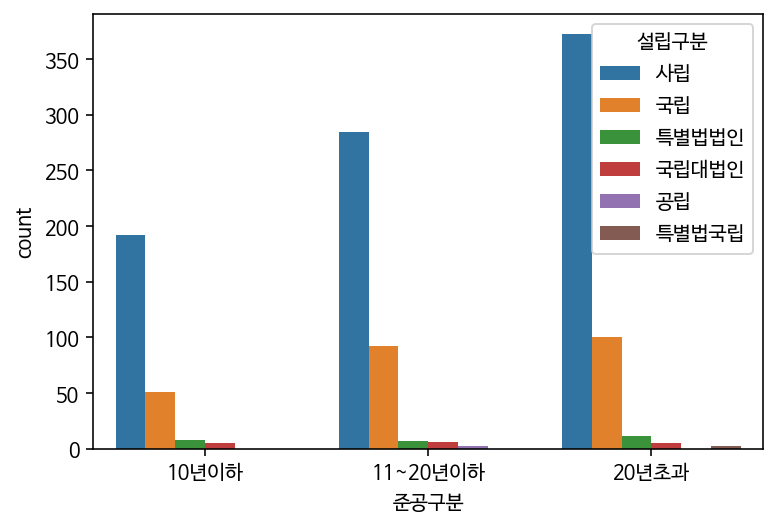

In [133]:
sns.countplot(x='준공구분', hue='설립구분', order=['10년이하','11~20년이하','20년초과'], data=df)
plt.show() 

 &#9997; **pandas 노트 : 데이터프레임의 인덱스**


---
+ 열의 인덱스 : **df.colums**
+ 행의 인덱스 : **df.index**
+ **데이터프레임의 인덱스 변경**
  - 열인덱스 명 변경 : df.column = [열명인덱스]
  - 열항목 중 하나를 인덱스로 사용 : df.set_index(열명)
  - 인덱스를 일반 데이터 열로 전환 : df.reset_index()
---



In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1151
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   int64   
 18  1인실실수        1137 non-null  

In [135]:
#인덱스 재설정
df = df.reset_index() 
df.head(2)

,index,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),...,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률,준공구분
0,0,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,88.00,672.00,...,0.00,0.00,0.00,88.00,3500.00,131250.00,32.62,338.00,0.50,11~20년이하
1,1,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,80.00,672.00,...,0.00,0.00,0.00,80.00,3500.00,128571.00,32.62,293.00,0.44,11~20년이하


In [ ]:
df.index

RangeIndex(start=0, stop=1137, step=1)

In [136]:
df = df.iloc[:, 1:] 
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률,준공구분
0,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,88.00,672.00,197.00,...,0.00,0.00,0.00,88.00,3500.00,131250.00,32.62,338.00,0.50,11~20년이하
1,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,80.00,672.00,183.00,...,0.00,0.00,0.00,80.00,3500.00,128571.00,32.62,293.00,0.44,11~20년이하


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   int64   
 18  1인실실수        1137 non-null  

In [ ]:
#준공연도 타입변경
df['준공연도'] =  
df['준공연도'] = 
df.info()

### 범주형 자료형

&#9997; **pandas 노트 : 각 열의 범주형 자료 분석**


---
+ **df.drop_duplicates()** : 중복값은 모두 제거하고 유일한 값만 표시
+ **df.unique()**: 각 열 내에 유일한 값을 확인
+ **df.value_counts()** : 각 열 내에 각각의 값이 나온 횟수 


---



[2021]
Categories (1, int64): [2021]

0          사립
27         국립
206     특별법법인
477     국립대법인
490        공립
1023    특별법국립
Name: 설립구분, dtype: object

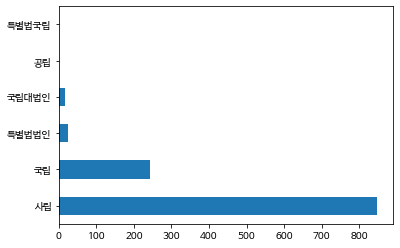

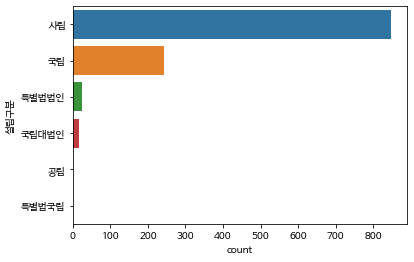

&#9997; **pandas 노트 : 조건에 맞는 자료 추출**


---
+ df[조건식]
  + 시리즈.isin([리스트])
  + and 연산 : &
  + or 연산 : | 
  + and 연산이나 or연산인 경우는 반드시 ()로 묶어서 사용



---

In [ ]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비', '기숙사수용률', '지원자수합계', '입사경쟁률', '준공구분'],
      dtype='object')

In [138]:
#부산지역 대학교 평균 기숙사수용률, 입사경쟁률
busan = df[(df['지역']=='부산') & (df['학교종류']=='대학교')]
busan1 = busan.loc[:, ['설립구분', '학교']]
busan2 = busan.loc[:, '1인실실수':]
busan3 = pd.concat([busan1, busan2], axis=1)
busan3

,설립구분,학교,1인실실수,1인실식비,1인실기숙사비,2인실실수,2인실식비,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률,준공구분
115,사립,경성대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11.25,5.00,0.00,20년초과
116,사립,경성대학교,4.00,0.00,373009.00,384.00,0.00,239629.00,0.00,0.00,0.00,0.00,0.00,0.00,11.25,536.00,0.37,11~20년이하
117,사립,경성대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11.25,10.00,0.01,20년초과
118,사립,경성대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11.25,8.00,0.01,20년초과
119,사립,경성대학교,4.00,0.00,373009.00,308.00,0.00,249558.00,0.00,0.00,0.00,0.00,0.00,0.00,11.25,860.00,0.60,10년이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,국립,한국해양대학교,100.00,2700.00,193966.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.05,100.00,0.04,20년초과
1045,국립,한국해양대학교,0.00,0.00,0.00,0.00,0.00,0.00,77.00,2300.00,171990.00,0.00,0.00,0.00,40.05,183.00,0.07,20년초과
1046,국립,한국해양대학교,19.00,0.00,0.00,794.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.05,619.00,0.23,10년이하
1047,국립,한국해양대학교,200.00,2300.00,168091.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.05,153.00,0.06,20년초과


In [140]:
busan1 = busan3.groupby('학교').mean()
busan1

,1인실실수,1인실식비,1인실기숙사비,2인실실수,2인실식비,2인실기숙사비,3인실실수,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률
학교,,,,,,,,,,,,,,,
경성대학교,1.14,0.00,106574.00,98.86,0.00,69883.86,0.00,0.00,0.00,0.71,0.00,0.00,11.25,205.14,0.14
고신대학교,1.33,1000.00,91448.33,22.00,1000.00,76793.00,61.67,1266.67,56250.00,80.67,2000.00,114879.33,37.26,406.00,0.24
동명대학교,0.00,0.00,0.00,9.33,2266.67,175972.33,85.67,1133.33,95756.33,24.00,1133.33,38558.67,14.18,390.33,0.35
동서대학교,21.40,0.00,94309.20,184.60,0.00,115273.00,3.80,0.00,20400.00,0.00,0.00,0.00,20.11,408.40,0.20
동아대학교,0.75,0.00,77675.88,149.62,0.00,186432.38,0.00,0.00,0.00,1.25,0.00,0.00,12.60,414.75,0.17
동의대학교,3.50,375.00,37672.01,192.62,2625.00,179828.25,0.00,0.00,0.00,0.00,0.00,0.00,20.15,519.62,0.17
부경대학교,35.50,3250.00,257702.50,494.50,3250.00,161556.25,0.00,0.00,0.00,0.00,0.00,0.00,23.84,1533.25,0.37
부산가톨릭대학교,0.00,0.00,0.00,113.00,0.00,163274.50,1.00,0.00,84956.00,3.50,0.00,79646.00,12.17,314.50,0.65
부산대학교,43.56,1405.56,149920.78,252.56,2511.11,139333.33,0.00,0.00,0.00,7.89,744.44,28132.11,21.50,613.00,0.11


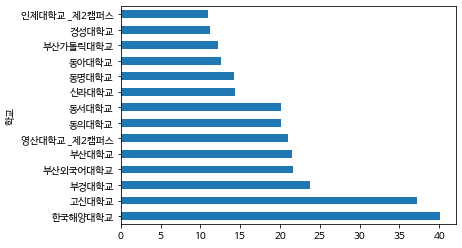

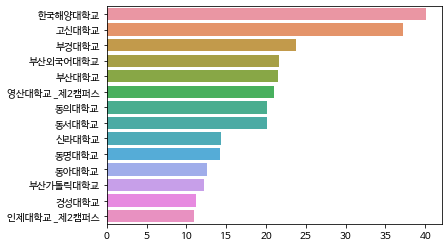

In [ ]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비', '기숙사수용률', '지원자수합계', '입사경쟁률', '준공구분'],
      dtype='object')

In [141]:
dt = {'사립':'사립', '국립':'국공립', '특별법법인':'국공립', '국립대법인':'국공립', '공립':'국공립', '특별법국립':'국공립'}
df['사립구분'] = df['설립구분'].map(dt)
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률,준공구분,사립구분
0,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,88.00,672.00,197.00,...,0.00,0.00,88.00,3500.00,131250.00,32.62,338.00,0.50,11~20년이하,사립
1,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,80.00,672.00,183.00,...,0.00,0.00,80.00,3500.00,128571.00,32.62,293.00,0.44,11~20년이하,사립


### 범주형 자료 시각화

array(['11~20년이하', '10년이하', '20년초과'], dtype=object)

In [ ]:
len(df['기준연도'].unique())

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   기준연도         1137 non-null   category
 1   학교종류         1137 non-null   object  
 2   설립구분         1137 non-null   object  
 3   지역           1137 non-null   object  
 4   상태           1137 non-null   object  
 5   학교           1137 non-null   object  
 6   재학생수(A)      1137 non-null   float64 
 7   총 실수         1137 non-null   float64 
 8   수용가능인원(B)    1137 non-null   float64 
 9   실수용(내국인)     1137 non-null   float64 
 10  실수용(외국인)     1137 non-null   float64 
 11  실수용(비학위)외국인  1137 non-null   float64 
 12  지원자수(동일지역)   1137 non-null   float64 
 13  지원자수(타지역)    1137 non-null   float64 
 14  의무식여부        1137 non-null   object  
 15  구분           1137 non-null   object  
 16  건물명          1137 non-null   object  
 17  준공연도         1137 non-null   int64   
 18  1인실실수        1137 non-null  

In [146]:
def snsCountplot(col) :
   sns.countplot(x =col, hue='사립구분', data=df)
   if len(df[col].unique()) > 20 : plt.xticks(rotation = 90)
   plt.show()

In [143]:
col1 = ['기준연도', '학교종류','설립구분', '지역', '구분', '준공연도','준공구분']

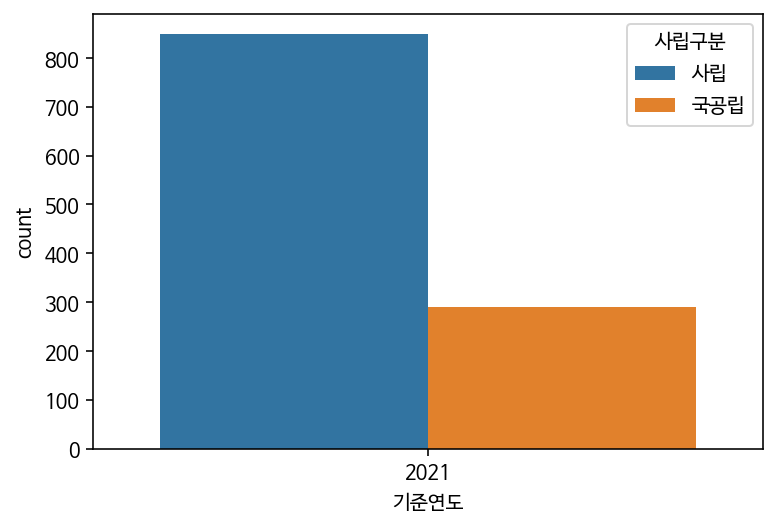

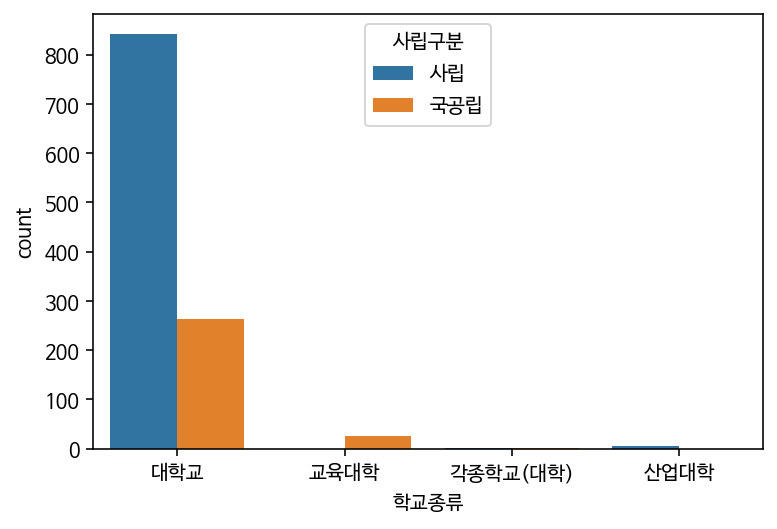

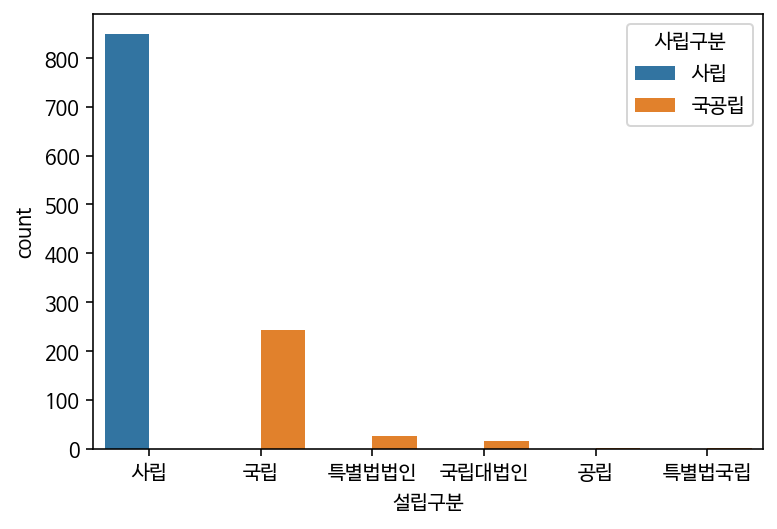

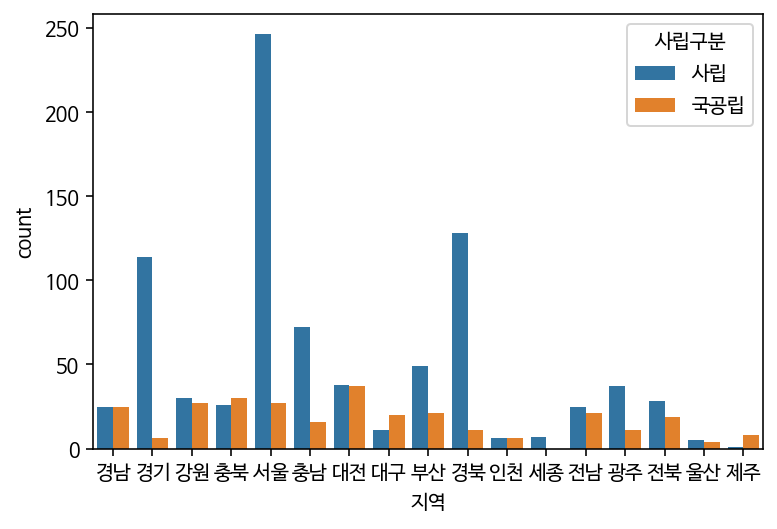

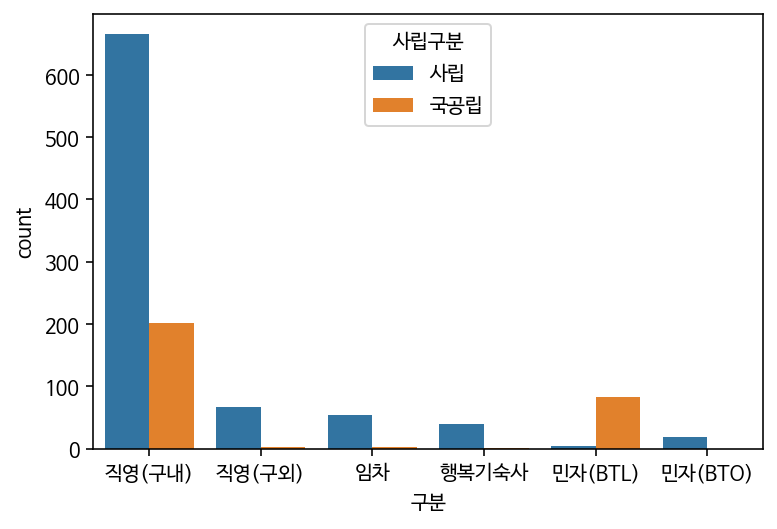

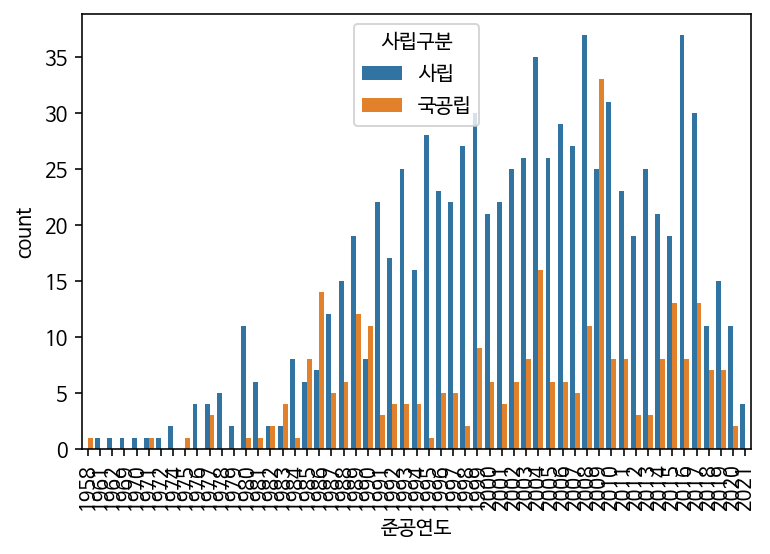

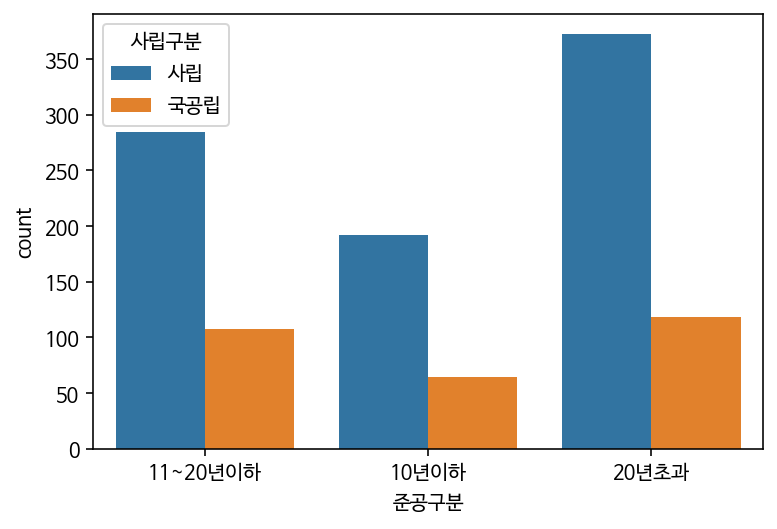

In [147]:
for col in col1 :
   snsCountplot(col)

### 수치형 자료형 시각화

In [ ]:
df.columns 

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비', '기숙사수용률', '지원자수합계', '입사경쟁률', '사립구분'],
      dtype='object')

In [ ]:
col2 = ['1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비', '기숙사수용률', '지원자수합계', '입사경쟁률']

In [ ]:
def snsBarplot(col) :
   

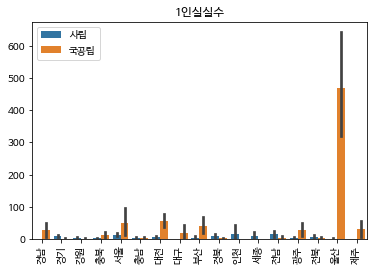

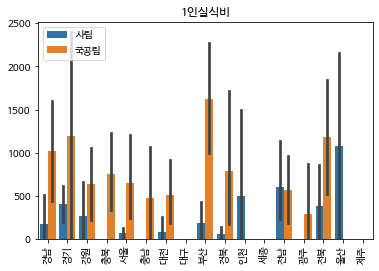

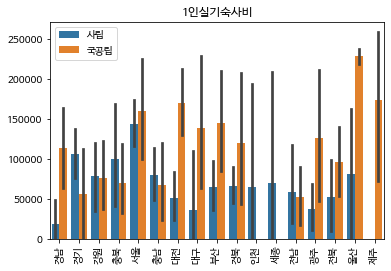

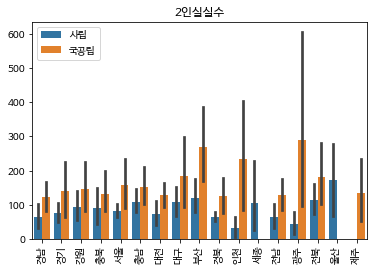

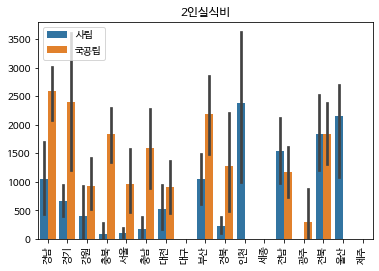

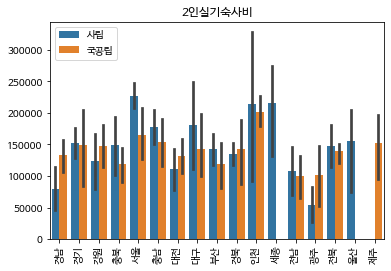

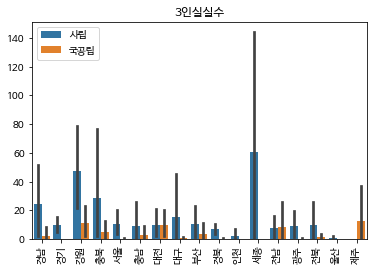

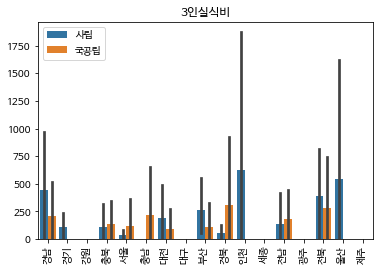

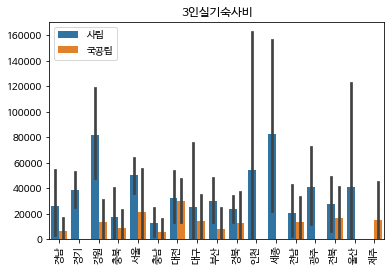

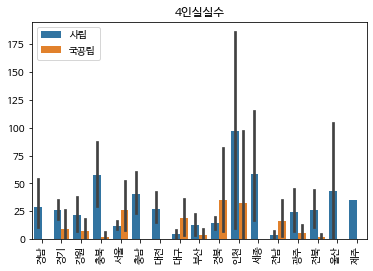

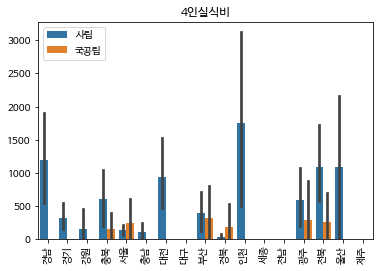

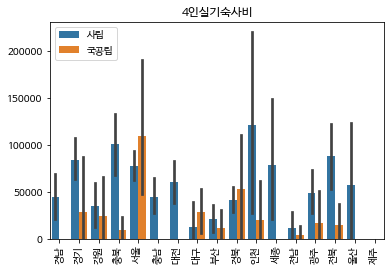

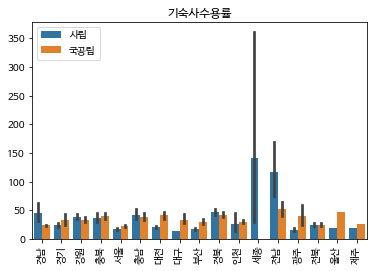

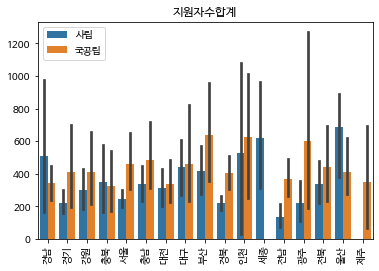

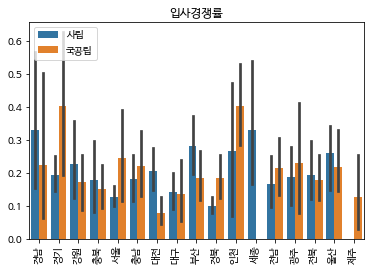

## 시각화를 이용한 데이터 분포 확인
+ 범주형 : bar
+ 수치형
  + 이산형 : bar
  + 연속형 : kdeplot, histogram
+ 범주형 + 수치형 : boxplot, violinplot, etc
+ 수치형 + 수치형 : scatter
+ 범주형 + 범주형 : heatmap

### 범주형 + 수치형

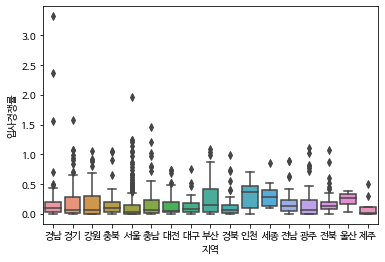

### 수치형 + 수치형

In [ ]:
col3 = ['1인실기숙사비', '2인실기숙사비','3인실기숙사비', '4인실기숙사비', '기숙사수용률', '사립구분']

In [ ]:
dfn = df.loc[:, col3]
dfn.head()

,1인실기숙사비,2인실기숙사비,3인실기숙사비,4인실기숙사비,기숙사수용률,사립구분
0,0.00,0.00,0.00,131250.00,32.62,사립
1,0.00,0.00,0.00,128571.00,32.62,사립
2,428571.00,326786.00,0.00,0.00,11.53,사립
3,424779.00,292035.00,207080.00,169912.00,11.53,사립
4,482737.00,343790.00,0.00,210105.00,11.53,사립


In [ ]:
def scplot(col) : 
 

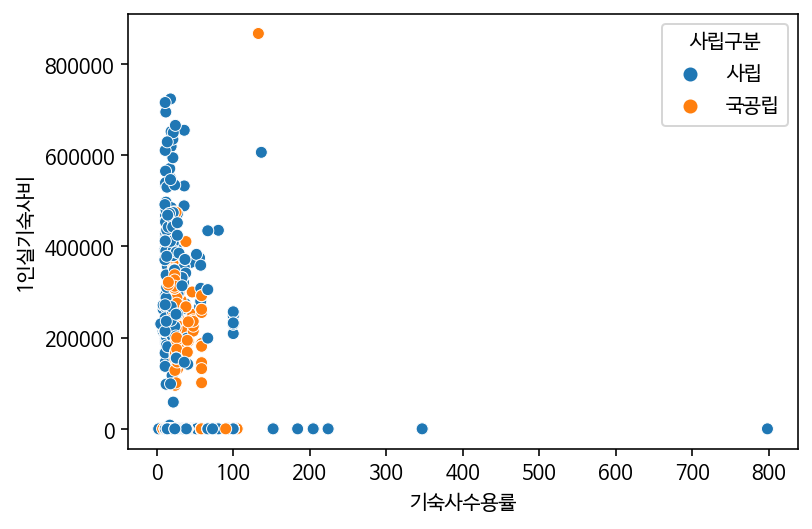

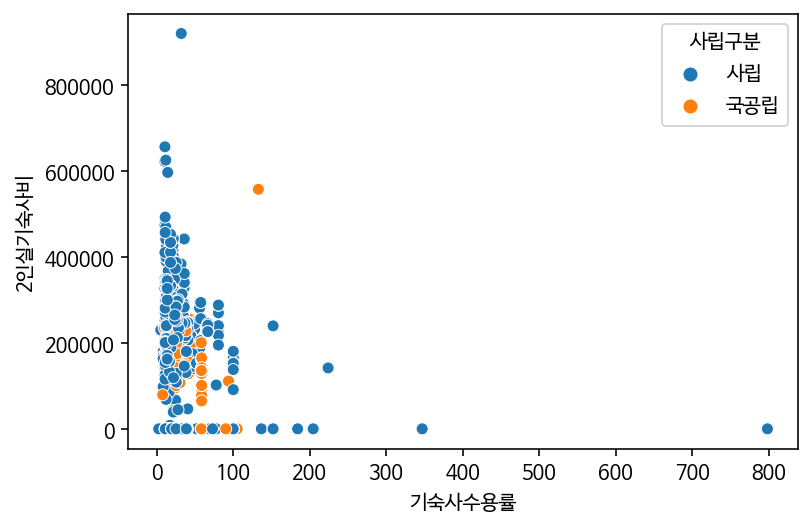

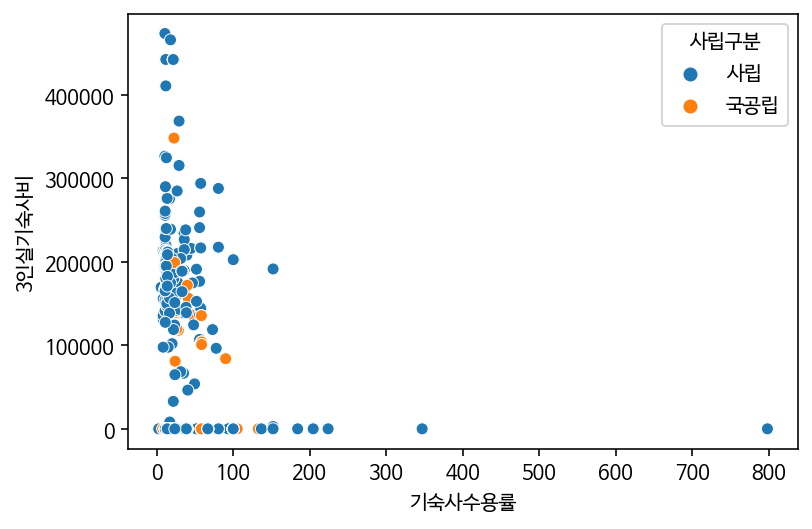

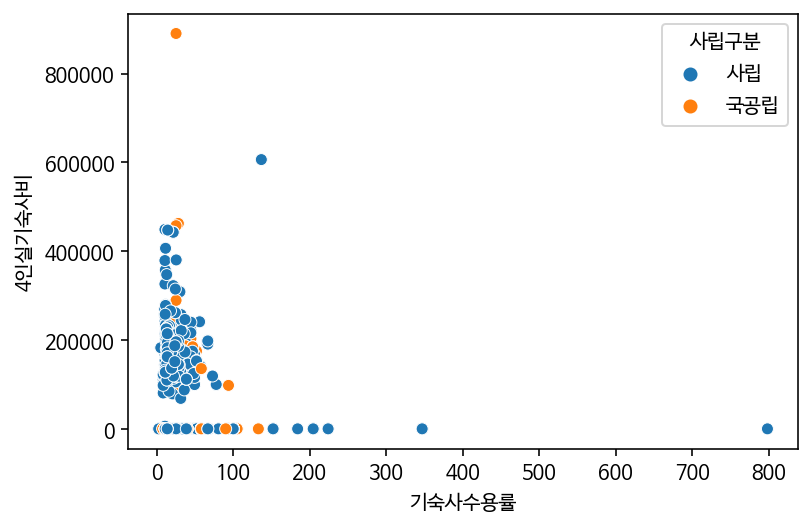

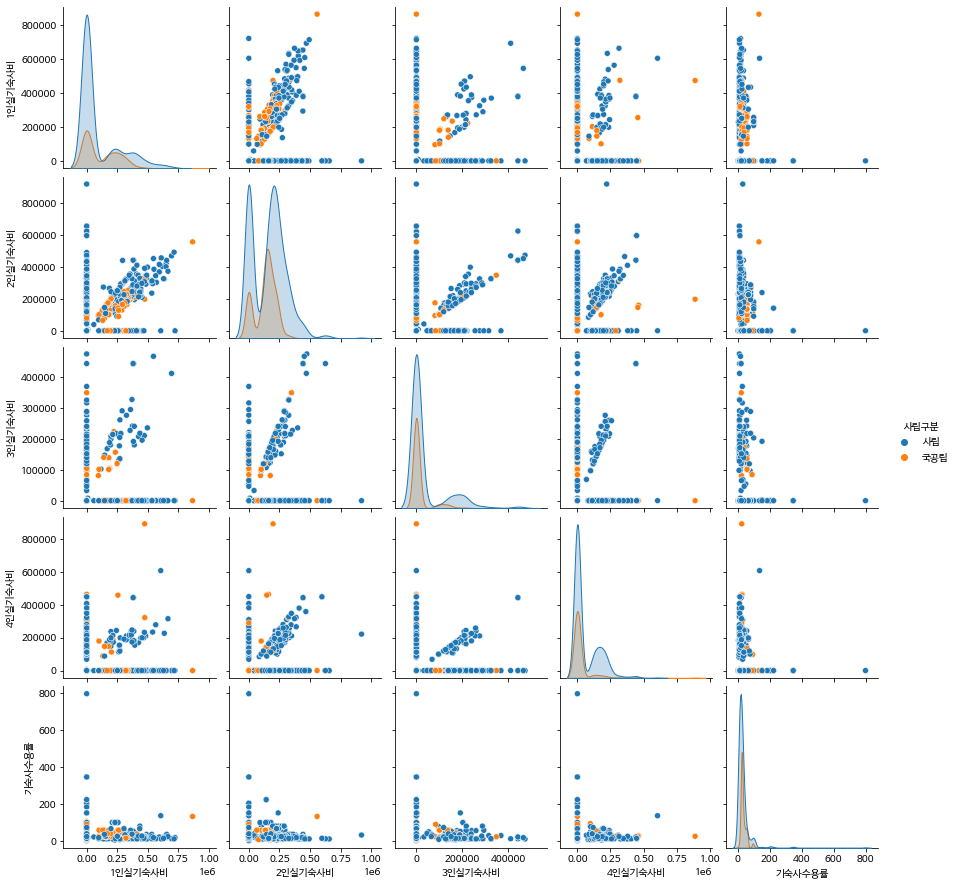

+ 상관관계 해석
  + 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.
  + 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.
  + 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.
  + 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.
  + 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.

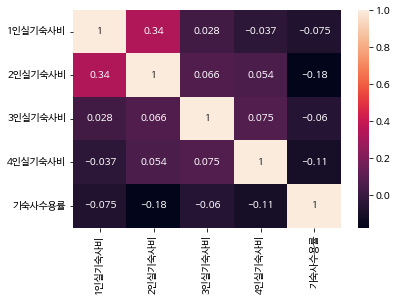

## 데이터 요약


### 피봇테이블(pivot table)
+ 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회
+ df.pivot_table(values='분석할열', index='행', columns='열', aggfunc='적용함수')

In [ ]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수(A)', '총 실수',
       '수용가능인원(B)', '실수용(내국인)', '실수용(외국인)', '실수용(비학위)외국인', '지원자수(동일지역)',
       '지원자수(타지역)', '의무식여부', '구분', '건물명', '준공연도', '1인실실수', '1인실식비', '1인실기숙사비',
       '2인실실수', '2인실식비', '2인실기숙사비', '3인실실수', '3인실식비', '3인실기숙사비', '4인실실수',
       '4인실식비', '4인실기숙사비', '기숙사수용률', '지원자수합계', '입사경쟁률', '준공구분', '사립구분'],
      dtype='object')

In [ ]:
dfv = df.pivot_table(values='4인실기숙사비', index='준공구분', columns='사립구분', aggfunc='mean')
dfv

사립구분,국공립,사립
준공구분,,
10년이하,10491.57,59144.32
11~20년이하,34219.31,65718.07
20년초과,16942.56,57853.41


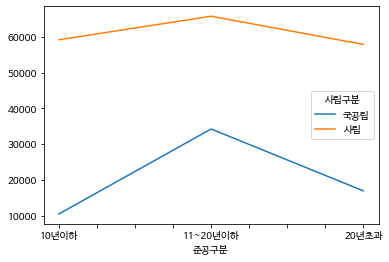

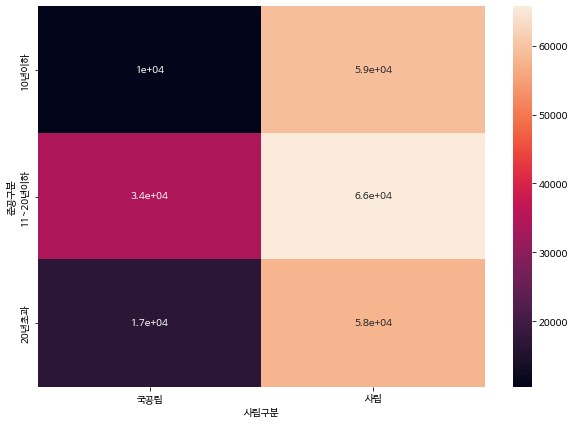

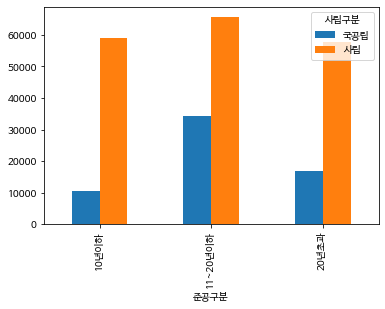

### group by 
+ 데이터 그룹을 이루는 경우에는 그룹의 특성

In [ ]:
dfg =  
dfg

1인실기숙사비   2인실기숙사비  3인실기숙사비  4인실기숙사비
준공구분     사립구분                                      
10년이하    국공립  185289.28 162213.83  2134.57 10491.57
         사립   145981.99 243874.67 47208.62 59144.32
11~20년이하 국공립  110655.93 144615.88 11414.51 34219.31
         사립    98606.78 164884.27 30540.34 65718.07
20년초과    국공립   70942.09 107132.04 22149.97 16942.56
         사립    54667.60 112567.13 34781.22 57853.41

## 데이터 저장

In [ ]:
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수(A),총 실수,수용가능인원(B),실수용(내국인),...,3인실식비,3인실기숙사비,4인실실수,4인실식비,4인실기숙사비,기숙사수용률,지원자수합계,입사경쟁률,준공구분,사립구분
0,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,88.00,672.00,197.00,...,0.00,0.00,88.00,3500.00,131250.00,32.62,338.00,0.50,11~20년이하,사립
1,2021,대학교,사립,경남,기존,가야대학교(김해),2060.00,80.00,672.00,183.00,...,0.00,0.00,80.00,3500.00,128571.00,32.62,293.00,0.44,11~20년이하,사립
